In [22]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/diamond --filename=out.log --output=../data/diamond-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/diamond --filename=out.log --output=../data/diamond-k-sos-mp2.json

In [23]:
import json, numpy
from matplotlib import pyplot as plt

data = {}

d1 = None
with open('../data/diamond-k-sos-mp2.json', 'r') as f:
    d1 = json.load(f)
d1 = {"/".join(k.split("/")[-2:]): v for k, v in d1.items()}

d2 = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    d2 = json.load(f)
d2 = {"/".join(k.split("/")[-2:]): v for k, v in d2.items()}

for k1 in sorted([k for k, v in d1.items()]):
    v1 = d1[k1]
    kmesh = k1.split("/")[-2]

    ene_krhf_ref = numpy.nan
    ene_os_ref = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_corr_mp2_ref = numpy.nan

    if k1 in d2:
        k2 = k1
        v2 = d2[k2]

        ene_krhf_ref = v2['ene_krhf']
        ene_os_ref = v2['ene_corr_os']
        ene_mp2_ref = v2['ene_kmp2']
        ene_corr_mp2_ref = v2['ene_corr_kmp2']
    
    out = ""
    ee = []
    for kk, vv in v1.items():
        if "ene_os" in kk:
            ee.append(vv)
            err = vv - ene_os_ref
            out += "%s/%s ene_os = % 12.8f, err = % 6.2e\n" % (k1, kk, vv, err)

    if len(ee) < 3:
        continue

    ene_os_sol = ee[2]
    err = ene_os_sol - ene_os_ref
    out += "%s %s = % 12.8f, err = % 6.2e\n" % (k1[:-1], "ene_os", ene_os_sol, err)
    # print(out)

    if "fftisdf-60-14" in k1:
        print(k1)
        data[kmesh] = {
            "ene_os": ene_os_sol,
            "ene_krhf": ene_krhf_ref,
            "ene_kmp2": ene_mp2_ref,
            "ene_corr_mp2": ene_corr_mp2_ref,
        }

print(len(data))

1-1-2/fftisdf-60-14
1-2-2/fftisdf-60-14
2-2-2/fftisdf-60-14
2-2-3/fftisdf-60-14
2-3-3/fftisdf-60-14
3-3-3/fftisdf-60-14
3-3-4/fftisdf-60-14
3-4-4/fftisdf-60-14
4-4-4/fftisdf-60-14
4-4-5/fftisdf-60-14
4-5-5/fftisdf-60-14
5-5-5/fftisdf-60-14
5-5-6/fftisdf-60-14
5-6-6/fftisdf-60-14
6-6-6/fftisdf-60-14
6-6-7/fftisdf-60-14
6-7-7/fftisdf-60-14
7-7-7/fftisdf-60-14
7-7-8/fftisdf-60-14
7-8-8/fftisdf-60-14
8-8-10/fftisdf-60-14
8-8-8/fftisdf-60-14
22


0 1-1-2 [-0.16646101 -0.16493648 -0.15516217] [-0.21764878 -0.21482378 -0.1979478 ]
kmesh = 1-1-2, ene_mp2 =  -0.21762387, err =  7.64e-05, ene_ccsd =  -0.24557065
1 1-2-2 [-0.16571868 -0.16198494 -0.13915351] [-0.22084472 -0.21401503 -0.17515447]
kmesh = 1-2-2, ene_mp2 =  -0.22811055, err =  9.50e-04, ene_ccsd =  -0.24831476
2 2-2-2 [-0.16070417 -0.15675257 -0.1215889 ] [-0.21526517 -0.2082366  -0.14890661]
kmesh = 2-2-2, ene_mp2 =  -0.23261815, err =  2.16e-03, ene_ccsd =  -0.25143934
3 2-3-3 [-0.15850227 -0.15314003 -0.11507633] [-0.21525205 -0.20601882 -0.1401193 ]
kmesh = 2-3-3, ene_mp2 =  -0.24966413, err =  2.65e-03, ene_ccsd =  -0.26200560
4 3-3-3 [-0.15804277 -0.15238743 -0.11457283] [-0.21431203 -0.20464236 -0.1390879 ]
kmesh = 3-3-3, ene_mp2 =  -0.25207692, err =  2.87e-03, ene_ccsd =  -0.26389312
5 3-3-4 [-0.15816519 -0.15268759 -0.11668717] [-0.2152652  -0.20574232 -0.14302192]
kmesh = 3-3-4, ene_mp2 =  -0.25695543, err =  2.88e-03, ene_ccsd =  -0.26687665
6 3-4-4 [-0.1583

TypeError: expected non-empty vector for x

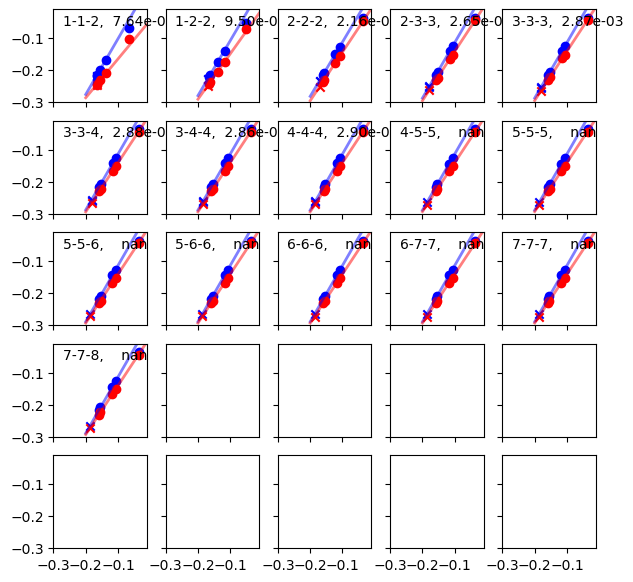

In [ ]:
d = None
with open('../data/diamond-klno.json', 'r') as f:
    d = json.load(f)

nx = 5
ny = 5
fig, axs = plt.subplots(nx, ny, figsize=(7, 7), sharex=True, sharey=True)

l = ["1-1-2", "1-2-2", "2-2-2", "2-3-3", "3-3-3"]
l += ["3-3-4", "3-4-4", "4-4-4", "4-5-5", "5-5-5"]
l += ["5-5-6", "5-6-6", "6-6-6", "6-7-7", "7-7-7"]
l += ["7-7-8", "7-8-8", "8-8-8"]


np = 1
# for ik, k1 in enumerate(sorted([k for k, v in data.items()])):

for ik, k1 in enumerate(l):
    v1 = data[k1]
    kk = [k for k, v in d.items() if k1 + "/fftisdf-60-14" in k]
    
    xx = [d[k]['ene_klno_corr_os']   for k in kk if 'ene_klno_corr_os' in d[k]]
    yy = [d[k]['ene_klno_corr_mp2']  for k in kk if 'ene_klno_corr_os' in d[k]]
    zz = [d[k]['ene_klno_corr_ccsd'] for k in kk if 'ene_klno_corr_os' in d[k]]

    assert len(xx) == len(yy) == len(zz)

    xx = numpy.array(xx)
    yy = numpy.array(yy)
    zz = numpy.array(zz)

    
    ax = axs[ik // ny, ik % nx]

    # fit xx and yy
    x = numpy.array(xx)
    y = numpy.array(yy)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    # print(ik, k1, x, y)

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, yy, label='MP2', color='blue')

    z = numpy.linspace(-0.2, 0.0, 100)
    ax.plot(z, poly(z), color='blue', label='MP2 fit', linewidth=2, alpha=0.5)
    # print(a, b, xx, a * xx + b)
    ene_mp2_sol = poly(v1['ene_os'])
    ene_mp2_ref = v1['ene_corr_mp2']
    err = ene_mp2_sol - ene_mp2_ref
    ax.scatter(v1['ene_os'], ene_mp2_sol, label='MP2', color='blue', marker='x')
    ax.scatter(v1['ene_os'], ene_mp2_ref, label='MP2 ref', color='blue', marker='x')
    # print("kmesh = %s, ene_mp2_sol = % 12.8f, err = % 6.2e" % (k1, ene_mp2_sol, err))

    ax.text(0.1, 0.8, "%s, % 6.2e" % (k1, err), ha='left', va='bottom', transform=ax.transAxes)

    x = numpy.array(xx)
    y = numpy.array(zz)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, zz, label='CCSD', color='red')
    ax.plot(z, poly(z), color='red', label='CCSD fit', linewidth=2, alpha=0.5)
    ene_ccsd_sol = poly(v1['ene_os'])
    ax.scatter(v1['ene_os'], ene_ccsd_sol, label='CCSD', color='red', marker='x')

    ax.set_xlim(-0.3, -0.01)
    ax.set_ylim(-0.3, -0.01)

    out = "kmesh = %s, ene_mp2 = % 12.8f, " % (k1, ene_mp2_sol)
    if not numpy.isnan(err):
        out += "err = % 6.2e, " % err
    out += "ene_ccsd = % 12.8f" % (ene_ccsd_sol)
    print(out)

fig.tight_layout()